# Titanic Data
- for practice data science

## Data Dictionary
### variable
- survival : 0 = No, 1 = Yes
- pclass : Ticket class / 1 = 1st(Upper), 2 = 2nd(Middle), 3 = 3rd(Lower)
- sex
- Age : Age in year
- sibsp : Number of siblings or spouses aboard the Titanic
- parch : Number of parents or childern
- ticket : Ticket number
- fare : Passenger fare
- cabin : Cabin number
- embarked : Port of embarked / C = Cherbourg, Q = Queenstown, S = Southamthon

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [180]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.info()
print('\n')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null flo

In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [197]:
def chart_bar(feature):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    total = survived + dead
    survived_rate = survived/total
    df = pd.DataFrame([survived_rate])
    return df.plot(kind = 'bar', title = ('Survived Rate : ' + feature), rot = 0)

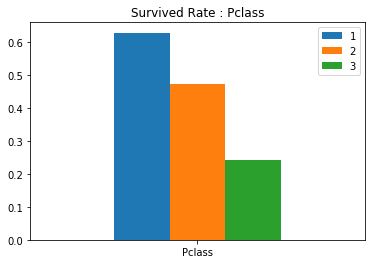

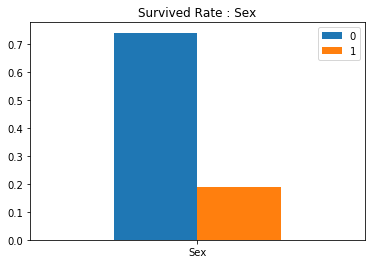

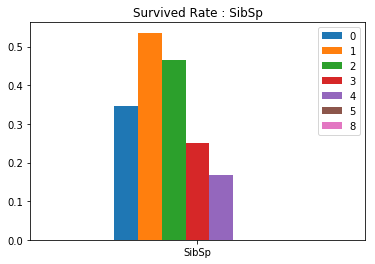

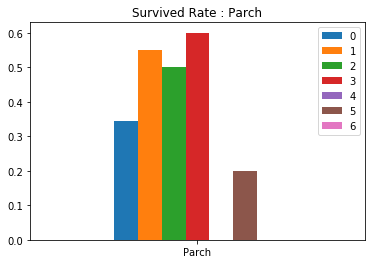

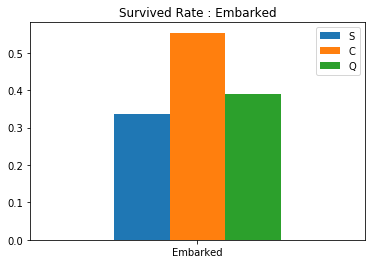

In [198]:
chart_bar('Pclass')
chart_bar('Sex')
chart_bar('SibSp')
chart_bar('Parch')
chart_bar('Embarked')

In [142]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [272]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [273]:
train_test_data = [train, test]
for data in train_test_data:
    data.drop("Name", axis = 1, inplace = True)

In [274]:
sex_mapping = {'male' : 1, 'female' : 0}
for data in train_test_data:
    data["Sex"] = data["Sex"].map(sex_mapping)
# or
#train.loc[train.Sex == 'male', 'Sex'] = 1
#train.head()

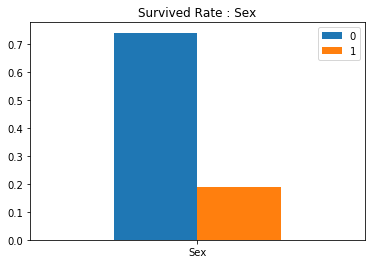

In [275]:
chart_bar("Sex")

In [200]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,S


In [205]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(6), object(3)
memory usage: 76.6+ KB


In [313]:
train.loc[train.Age < 10, "Age"] = 0
train.loc[(train.Age >= 10) & (train.Age < 20), "Age"] = 10
train.loc[(train.Age >= 20) & (train.Age < 30), "Age"] = 20
train.loc[(train.Age >= 30) & (train.Age < 40), "Age"] = 30
train.loc[(train.Age >= 40) & (train.Age < 50), "Age"] = 40
train.loc[(train.Age >= 50) & (train.Age < 60), "Age"] = 50
train.loc[(train.Age >= 60) & (train.Age < 70), "Age"] = 60
train.loc[(train.Age >= 70) & (train.Age < 80), "Age"] = 70
train["Age"].value_counts()

20.0    220
30.0    167
10.0    102
40.0     89
0.0      62
50.0     48
60.0     19
70.0      6
80.0      1
Name: Age, dtype: int64

In [325]:
train["Age"].value_counts().sort_index()

0.0      62
10.0    102
20.0    220
30.0    167
40.0     89
50.0     48
60.0     19
70.0      6
80.0      1
Name: Age, dtype: int64

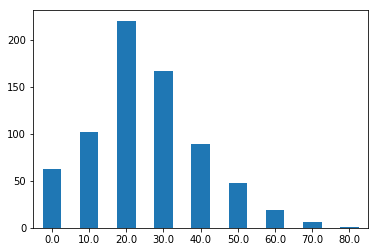

In [331]:
train["Age"].value_counts().sort_index().plot(kind = 'bar', rot = 0)